In [1]:
import numpy as np
from matplotlib import pyplot as pl
import os
import scipy.io.wavfile as wav

%matplotlib inline

In [2]:
PATH = '/home/arthur/Projects/MLG_Labs/pw2/vowels/'

In [3]:
sample_rate_1, X_1 = wav.read(os.path.join(PATH, 'nafdlal.wav'))
sample_rate_2, X_2 = wav.read(os.path.join(PATH, 'nafdloo.wav'))

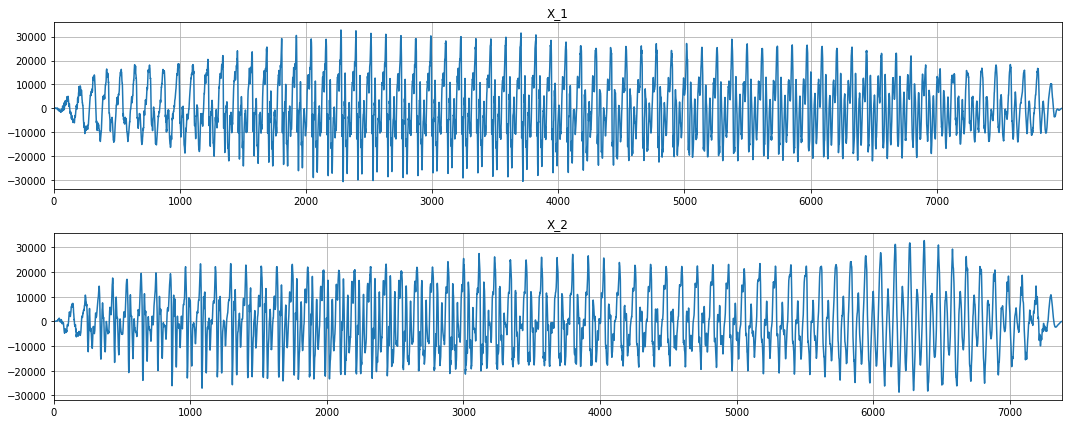

In [4]:
pl.figure(figsize=(15,6))
pl.subplot(2,1,1)
pl.plot(X_1)
pl.xlim(0, len(X_1))
pl.title('X_1')
pl.grid()
pl.subplot(2,1,2)
pl.plot(X_2)
pl.xlim(0, len(X_2))
pl.title('X_2')
pl.grid()
pl.tight_layout()

In [5]:
from python_speech_features import mfcc
import numpy
import mlp_backprop_momentum as mlp
import sys
from ipywidgets import interact, widgets

In [6]:
ceps_1 = mfcc(X_1, samplerate=sample_rate_1, nfft=1024, numcep=8)
ceps_2 = mfcc(X_2, samplerate=sample_rate_2, nfft=1024, numcep=8)


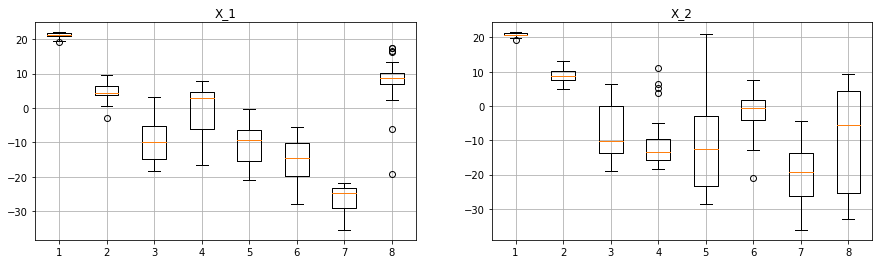

In [7]:
pl.figure(figsize=(15,4))
pl.subplot(1,2,1)
pl.boxplot(ceps_1)
pl.title('X_1')
pl.grid()
pl.subplot(1,2,2)
pl.boxplot(ceps_2)
pl.title('X_2')
pl.grid()

0


Text(0.5,1,'X_1')

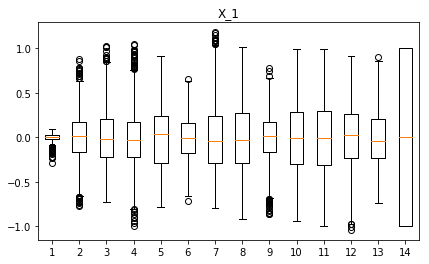

In [50]:
import os
path = '/home/arthur/Projects/MLG_Labs/pw2/vowels/'

def getFullDataSet(path, pop1, pop2):
    
    files0 = []
    files1 = []
    medians0 = []
    medians1 = []
    maxs0 = []
    maxs1 = []

    for i in os.listdir(path):
        if os.path.isfile(os.path.join(path,i)) and pop1 in i:
            files0.append(i)
        if os.path.isfile(os.path.join(path,i)) and pop2 in i:
            files1.append(i)

    sample_rate, X = wav.read(os.path.join(PATH, files0[0]))
    ceps0 = mfcc(X, samplerate=sample_rate, nfft=1024, numcep=13)

    for i in range(len(files0)-1):
        sample_rate, X = wav.read(os.path.join(PATH, files0[i+1]))
        ceps0 = np.concatenate((ceps0, mfcc(X, samplerate=sample_rate, nfft=1024, numcep=13)), axis=0)

    sample_rate, X = wav.read(os.path.join(PATH, files1[0]))
    ceps1 = mfcc(X, samplerate=sample_rate, nfft=1024, numcep=13)
    
    for i in range(len(files1)-1):
        sample_rate, X = wav.read(os.path.join(PATH, files1[i+1]))
        ceps1 = np.concatenate((ceps1, mfcc(X, samplerate=sample_rate, nfft=1024, numcep=13)), axis=0)

    for i in range(len(ceps0[:])):
        medians0 = ceps0.mean(axis=0)
        maxs0 = numpy.max(np.abs(ceps0), axis=0)
            
    for i in range(len(ceps1[:])):
        medians1 = ceps1.mean(axis=0)
        maxs1 = numpy.max(np.abs(ceps1), axis=0)
  
    for i in range(len(ceps0)):
        for j in range(len(ceps0[i])):
            ceps0[i][j] = (ceps0[i][j] - medians0[j]) / maxs0[j]
            
    for i in range(len(ceps1)):
        for j in range(len(ceps1[i])):
            ceps1[i][j] = (ceps1[i][j] - medians1[j]) / maxs1[j]

    class0 = np.ones(len(ceps0)) 
    class1 = -1*np.ones(len(ceps1))
    
  
    ceps0 = np.concatenate((ceps0, np.array(class0)[:, None]), axis = 1)
    ceps1 = np.concatenate((ceps1, np.array(class1)[:, None]), axis = 1)

    ceps_total = np.concatenate((ceps0, ceps1), axis=0)
    return ceps_total

print(str(len(ceps)))
pl.figure(figsize=(15,4))
pl.subplot(1,2,1)
pl.boxplot(getFullDataSet(path, 'nam', 'sam'))
pl.title('X_1')

In [43]:
def split_dataset(dataset, n_parts=5):
    n_rows = dataset.shape[0]
    index_all = np.arange(n_rows)
    np.random.shuffle(index_all)
    parts = []
    current_start = 0
    for p in np.arange(n_parts):
        current_end = current_start + int(np.floor(n_rows / (n_parts-p)))
        parts.append(dataset[index_all[current_start:current_end],:])
        n_rows -= current_end - current_start
        current_start = current_end
    return parts

def k_fold_cross_validation(mlp, dataset, K=5, learning_rate=0.01, momentum=0.7, epochs=100):
    MSE_train_mean = 0.0
    MSE_test_mean = 0.0

    parts = split_dataset(dataset, K)
    
    for k in np.arange(K):
        mlp.init_weights()
        
        training_parts = set(np.arange(K))
        training_parts.remove(k)
        dataset_train = np.concatenate([parts[i] for i in list(training_parts)])
        dataset_test = parts[k]

        input_data = dataset_train[:,0:nn.n_inputs]
        output_data = dataset_train[:,nn.n_inputs:(nn.n_inputs+nn.n_outputs)]
        input_data_test = dataset_test[:,0:nn.n_inputs]
        output_data_test = dataset_test[:,nn.n_inputs:(nn.n_inputs+nn.n_outputs)]
        
        MSE_train = mlp.fit((input_data, output_data),
                            learning_rate=learning_rate, momentum=momentum, epochs=epochs)
        temp, _ = mlp.compute_MSE((input_data, output_data))
        MSE_train_mean += temp
        temp, _ = mlp.compute_MSE((input_data_test, output_data_test))
        MSE_test_mean += temp

    return (MSE_train_mean / K, MSE_test_mean / K)
path = '/home/arthur/Projects/MLG_Labs/pw2/vowels/'

manVswoman = []
manVswoman = getFullDataSet(path, 'naf', 'nam')

